## **SMS Spam Classifier**

   In this project we are going to classify sms into two categories (spam and ham).

In [ ]:
# Import some libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read data
url = '/content/drive/MyDrive/Kaggle_Datasets/Machine Learning /Classification /spam_classifier.csv'
df = pd.read_csv(url,encoding='Windows-1252') # or "ISO-8859-1"
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
print(df.shape)
print(df.info())

(5572, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


In [ ]:
# Checking null values
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

###### *  **Unnamed:2**,**Unnamed: 3** and **Unnamed: 4** columns have lots of null values.
 So, we need analyze the data

### **Steps involved in data**

* 1. Data cleaning
*2. EDA
* 3. Text Preprocessing
* 4. Model building
* 5. Evaluation
* 6. Improvement
* 7. Website
* 8. Deploy

### **1.Data Cleaning**

As we can see,**last 3 columns are not usefull** for us. We can **delete them** and left only labels (**"v1"** column) and data (**"v2"** column).

In [ ]:
# Drop last 3 features
df = df.drop(df.iloc[:,2:],axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Rename the columns
df.rename(columns={'v1':'target', 'v2':'text'},inplace=True)
df.sample(5)

,target,text
2000,ham,But i'll b going 2 sch on mon. My sis need 2 t...
2351,spam,Download as many ringtones as u like no restri...
1853,ham,I just made some payments so dont have that mu...
3424,ham,True. Its easier with her here.
3890,ham,No problem. We will be spending a lot of quali...


In [ ]:
# Convert target column into Numeric
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Missing values
df.isna().sum().any()

False

In [ ]:
# Checking for duplicate values
print('Shape', df.shape)
print('Total number of Duplicate values are:',df.duplicated().sum())

Shape (5572, 2)
Total number of Duplicate values are: 403


In [ ]:
# Remove duplicates
df = df.drop_duplicates(keep='first') 
print('Shape', df.shape)
print('After removing Duplicate values:',df.duplicated().sum())

Shape (5169, 2)
After removing Duplicate values: 0


#### **2.EDA(Exploratory Data Analysis)**

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#### **Visualize Data**

###### Let's check **how many records of each class** we have.

Text(0.5, 1.0, 'Spam Vs Ham')

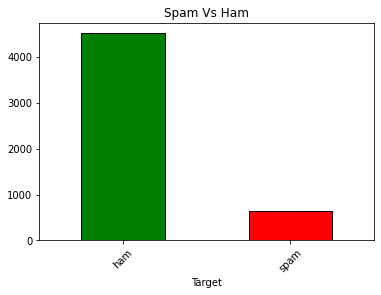

In [ ]:
df.target.value_counts().plot.bar(color=['green','red'],edgecolor='black')

plt.xticks([0,1],['ham','spam'],rotation=45)
plt.xlabel('Target') 
plt.title('Spam Vs Ham')

###### Data is imbalanced

In [ ]:
import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Create a new column which contains no.of characters in each text column
df['num_chars'] = [len(x) for x in df['text']]
#df['num_chars'] = df['text'].apply(len)
df.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# Create a new column which contains no.of words in each text column
#df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_words'] = [len(nltk.word_tokenize(i)) for i in df['text']]
df.head()

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
# Create a new column which contains no.of characters in each text column
#df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df['num_sentences'] = [len(nltk.sent_tokenize(i)) for i in df['text']]
df.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
# Description of all Numeric Variables
df.iloc[:,2:].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [ ]:
# Description of Ham data
df[df['target']== 0].iloc[:,2:].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [ ]:
# Description of Spam data
df[df['target']== 1].iloc[:,2:].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


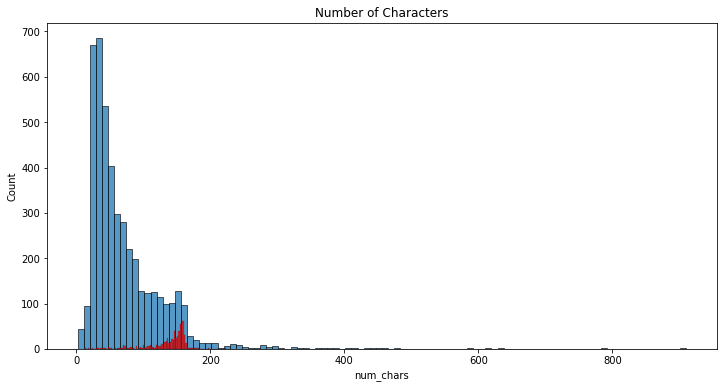

In [ ]:
# Distribution of No.of Characters data
plt.figure(figsize=(12,6))
plt.title('Number of Characters') 

sns.histplot(df[df['target']== 0].iloc[:,2],bins=100)
sns.histplot(df[df['target']== 1].iloc[:,2],bins=100,color='red')
plt.show()

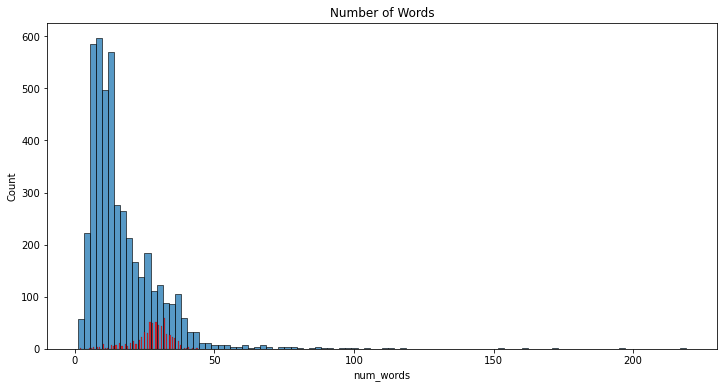

In [ ]:
# Distribution of No.of words data
plt.figure(figsize=(12,6))
plt.title('Number of Words') 

sns.histplot(df[df['target']== 0].iloc[:,3],bins=100)
sns.histplot(df[df['target']== 1].iloc[:,3],bins=100,color='red')
plt.show()

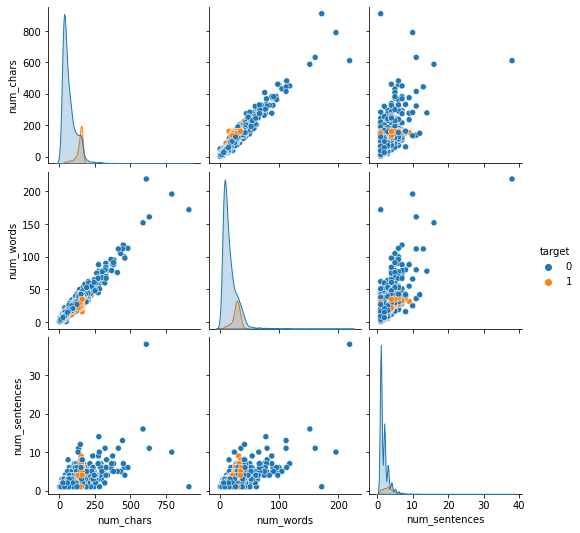

In [ ]:
# Pairplot
sns.pairplot(df,hue='target')

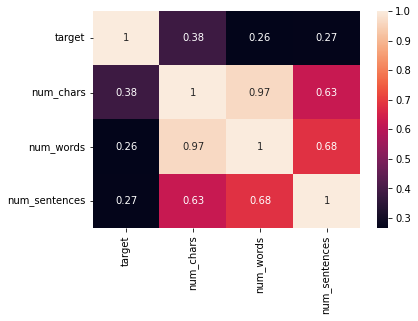

In [ ]:
# Correlation matrix by heatmap
sns.heatmap(df.corr(),annot=True)
plt.show()

### **3.Data Preprocessing**

###### --> **Steps involved in data Preprocessing**

* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
*Stemming

###### Firstly, we should delete **stop words** and **Punctuations**. The words which are generally filtered out before processing a natural language are called **stop words**. These are actually the most common words in any language (like articles, prepositions, pronouns, conjunctions, etc) and does not add much information to the text. **Examples of a few stop words in English are “the”, “a”, “an”, “so”, “what”.**

***Examples of a few punctuation are '!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~'**

And also perform **Stemming** and **some other operations**

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
        y.append(' ')
    
            
    return "".join(y)

In [ ]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
text = "I am gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."
transform_text(text) #df[['text']])

'gon na home soon want talk stuff anymor tonight k cri enough today '

In [ ]:
""" sentence = ['Hello', ' How are you guys']

def stemSentence(sentence):
    ps = PorterStemmer()
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(ps.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

for i in sentence:
    print(stemSentence(i))
"""

' sentence = [\'Hello\', \' How are you guys\']\n\ndef stemSentence(sentence):\n    ps = PorterStemmer()\n    token_words=word_tokenize(sentence)\n    token_words\n    stem_sentence=[]\n    for word in token_words:\n        stem_sentence.append(ps.stem(word))\n        stem_sentence.append(" ")\n    return "".join(stem_sentence)\n\nfor i in sentence:\n    print(stemSentence(i))\n'

In [ ]:
# Create a new feature of transformation of text data
df['transformed_text'] = df['text'].apply(transform_text)
#df['transformed_text2'] = df['text'].apply(stemSentence)

In [ ]:
df.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
print(df['transformed_text'][0])
#print(df['transformed_text2'][0])

go jurong point avail bugi n great world la e buffet cine got amor wat 


#### **Word Cloud**

Now,here **Word Cloud** is used to show the most frequent words in **Ham** and **Spam** classes

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
# Most Frequent words in Spam class
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))

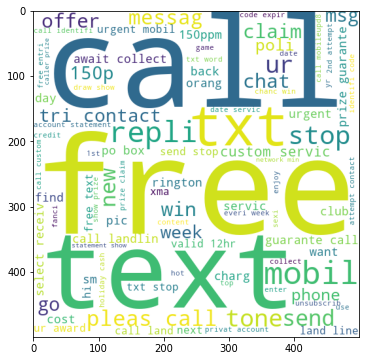

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.show()

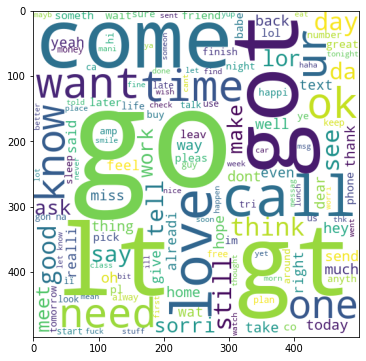

In [ ]:
# Most Frequent words in Ham class
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

###### Combining all **spam** and **ham** class data into **spam and ham corpuses**

In [ ]:
# The most common words in spam class
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9883

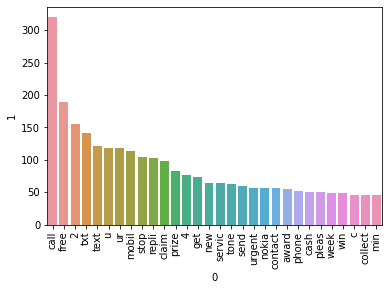

In [ ]:
from collections import Counter

data = pd.DataFrame(Counter(spam_corpus).most_common(30))

sns.barplot(data[0],data[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# The most common words in ham class
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

34771

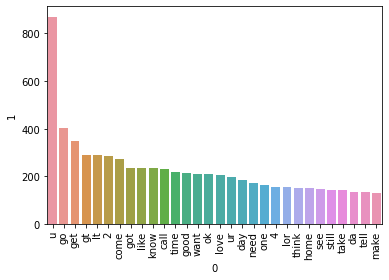

In [ ]:
data = pd.DataFrame(Counter(ham_corpus).most_common(30))

sns.barplot(data[0],data[1])
plt.xticks(rotation='vertical')
plt.show()

### **4.Model Building**

###### Here we are going to use **CountVectorizer** from sklearn library. It converts a collection of text documents to a matrix of token counts. And also, here we can pass the parameter **stop_words**.

In [ ]:
# Text Vectorization using Bag of Words & Tfidf
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

X, which is sparse matrix of type '<class 'numpy.int64'>. That's why **we need to convert it to array**.

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 3000)

###### So, as we can see, we have a lot of features (8404 in total) reduced to 3000 features.

In [ ]:
X[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y = df['target'].values

In [ ]:
# Divide to train and test data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

### **Normalize data¶**
We will apply **min-max** normalization in range [0,1].

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1)) # range is [0, 1]

In [ ]:
X_train = scaler.fit_transform(X_train.copy())
X_train[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_test = scaler.fit_transform(X_test.copy())
X_test[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

###### Here we can use **Naive bayes** model to classify class

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

#### **Gaussian NB**

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score

cm = confusion_matrix(y_test,y_pred1)

score = accuracy_score(y_test,y_pred1)

cr = classification_report(y_test,y_pred1)


print("\nConfusion Matrix:\n\n",cm)

print("\n\nAccuracy Score:\n\n",score)

print("\n\nClassification Report:\n\n",cr)


Confusion Matrix:

 [[1175  167]
 [  23  186]]


Accuracy Score:

 0.877498388136686


Classification Report:

               precision    recall  f1-score   support

           0       0.98      0.88      0.93      1342
           1       0.53      0.89      0.66       209

    accuracy                           0.88      1551
   macro avg       0.75      0.88      0.79      1551
weighted avg       0.92      0.88      0.89      1551



#### **Multinomial NB**

In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)

cm = confusion_matrix(y_test,y_pred2)

score = accuracy_score(y_test,y_pred2)

cr = classification_report(y_test,y_pred2)


print("\nConfusion Matrix:\n\n",cm)

print("\n\nAccuracy Score:\n\n",score)

print("\n\nClassification Report:\n\n",cr)


Confusion Matrix:

 [[1337    5]
 [  26  183]]


Accuracy Score:

 0.9800128949065119


Classification Report:

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1342
           1       0.97      0.88      0.92       209

    accuracy                           0.98      1551
   macro avg       0.98      0.94      0.96      1551
weighted avg       0.98      0.98      0.98      1551



#### **Bernoulli NB**

In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)

cm = confusion_matrix(y_test,y_pred3)

score = accuracy_score(y_test,y_pred3)

cr = classification_report(y_test,y_pred3)


print("\nConfusion Matrix:\n\n",cm)

print("\n\nAccuracy Score:\n\n",score)

print("\n\nClassification Report:\n\n",cr)


Confusion Matrix:

 [[1341    1]
 [  37  172]]


Accuracy Score:

 0.9754996776273372


Classification Report:

               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1342
           1       0.99      0.82      0.90       209

    accuracy                           0.98      1551
   macro avg       0.98      0.91      0.94      1551
weighted avg       0.98      0.98      0.97      1551



#### From all the above models **TfIdf** with **Multinimial NB** is the best model

Now let's try different models that which gives the best performance (**accuracy** and **Precision**) Scores

In [ ]:
# Import all required classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
# Create estimators
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
# Create a dictionary 
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
# Create a function
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9658284977433914, 0.9239130434782609)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("\nFor ",name,'\n')
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  SVC 

Accuracy -  0.9658284977433914
Precision -  0.9239130434782609

For  KN 

Accuracy -  0.9032882011605415
Precision -  1.0

For  NB 

Accuracy -  0.9800128949065119
Precision -  0.973404255319149

For  DT 

Accuracy -  0.9303675048355899
Precision -  0.8344370860927153

For  LR 

Accuracy -  0.9690522243713733
Precision -  0.9653179190751445

For  RF 

Accuracy -  0.9748549323017408
Precision -  0.9885057471264368

For  AdaBoost 

Accuracy -  0.9645390070921985
Precision -  0.9325842696629213

For  BgC 

Accuracy -  0.9555125725338491
Precision -  0.8645833333333334

For  ETC 

Accuracy -  0.9800128949065119
Precision -  0.978494623655914

For  GBDT 

Accuracy -  0.9529335912314636
Precision -  0.9533333333333334

For  xgb 

Accuracy -  0.941972920696325
Precision -  0.9612403100775194


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.903288,1.000000
5,RF,0.974855,0.988506
8,ETC,0.980013,0.978495
2,NB,0.980013,0.973404
4,LR,0.969052,0.965318
10,xgb,0.941973,0.961240
9,GBDT,0.952934,0.953333
6,AdaBoost,0.964539,0.932584
0,SVC,0.965828,0.923913
7,BgC,0.955513,0.864583


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.903288
1,RF,Accuracy,0.974855
2,ETC,Accuracy,0.980013
3,NB,Accuracy,0.980013
4,LR,Accuracy,0.969052
5,xgb,Accuracy,0.941973
6,GBDT,Accuracy,0.952934
7,AdaBoost,Accuracy,0.964539
8,SVC,Accuracy,0.965828
9,BgC,Accuracy,0.955513


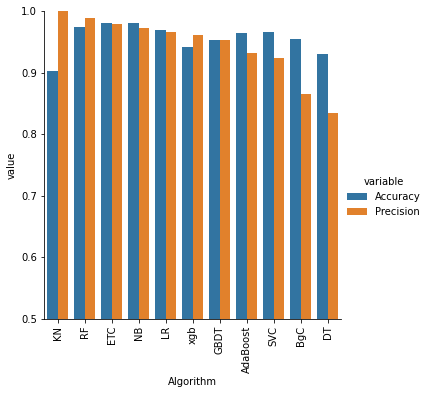

In [ ]:
sns.catplot(x='Algorithm',y='value', data=performance_df1,hue='variable',kind='bar',height=5)

plt.ylim(0.5,1.0)
plt.xticks(rotation=90)
plt.show()

## **model improvements**
###### By Changing the max_features parameter of TfIdf to 3000

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.903288,1.000000
5,RF,0.974855,0.988506
8,ETC,0.980013,0.978495
2,NB,0.980013,0.973404
4,LR,0.969052,0.965318
10,xgb,0.941973,0.961240
9,GBDT,0.952934,0.953333
6,AdaBoost,0.964539,0.932584
0,SVC,0.965828,0.923913
7,BgC,0.955513,0.864583


In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
temp_df

,Algorithm,Accuracy_scaling,Precision_scaling
1,KN,0.903288,1.000000
5,RF,0.974855,0.988506
8,ETC,0.980013,0.978495
2,NB,0.980013,0.973404
4,LR,0.969052,0.965318
10,xgb,0.941973,0.961240
9,GBDT,0.952934,0.953333
6,AdaBoost,0.964539,0.932584
0,SVC,0.965828,0.923913
7,BgC,0.955513,0.864583


In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.903288,1.000000,0.903288,1.000000,0.903288,1.000000,0.903288,1.000000
1,RF,0.974855,0.988506,0.974855,0.988506,0.974855,0.988506,0.974855,0.988506
2,ETC,0.980013,0.978495,0.980013,0.978495,0.980013,0.978495,0.980013,0.978495
3,NB,0.980013,0.973404,0.980013,0.973404,0.980013,0.973404,0.980013,0.973404
4,LR,0.969052,0.965318,0.969052,0.965318,0.969052,0.965318,0.969052,0.965318
5,xgb,0.941973,0.961240,0.941973,0.961240,0.941973,0.961240,0.941973,0.961240
6,GBDT,0.952934,0.953333,0.952934,0.953333,0.952934,0.953333,0.952934,0.953333
7,AdaBoost,0.964539,0.932584,0.964539,0.932584,0.964539,0.932584,0.964539,0.932584
8,SVC,0.965828,0.923913,0.965828,0.923913,0.965828,0.923913,0.965828,0.923913
9,BgC,0.955513,0.864583,0.955513,0.864583,0.955513,0.864583,0.955513,0.864583


In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma=1.0, kernel='sigmoid', max_iter=-1,
                                  probability=True, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False)),
                             ('nb',
                              MultinomialNB(alpha=1.0, class_prior=None,
                                            fit_prior=True)),
                             ('et',
                              ExtraTreesClassifier...
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9735449735449735


In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)

StackingClassifier(cv=None,
                   estimators=[('svm',
                                SVC(C=1.0, break_ties=False, cache_size=200,
                                    class_weight=None, coef0=0.0,
                                    decision_function_shape='ovr', degree=3,
                                    gamma=1.0, kernel='sigmoid', max_iter=-1,
                                    probability=True, random_state=None,
                                    shrinking=True, tol=0.001, verbose=False)),
                               ('nb',
                                MultinomialNB(alpha=1.0, class_prior=None,
                                              fit_prior=True)),
                               ('et',
                                ExtraTrees...
                                                          criterion='gini',
                                                          max_depth=None,
                                                          max_features=

In [ ]:
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9786096256684492


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))